In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_iris=pd.read_csv("IRIS.csv")

In [3]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

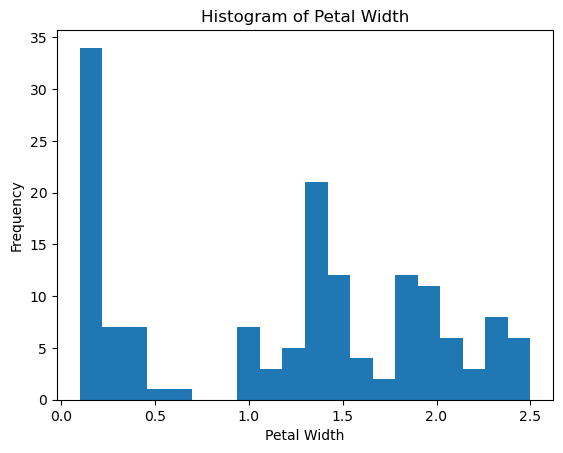

In [8]:
df_iris['petal_width'].plot(kind='hist', bins=20)
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

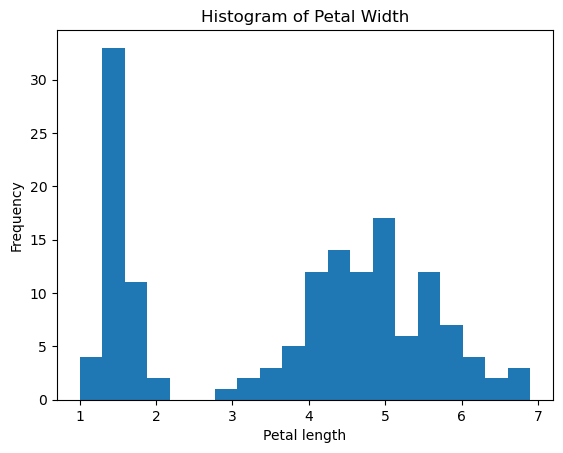

In [9]:
df_iris['petal_length'].plot(kind='hist', bins=20)
plt.xlabel('Petal length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

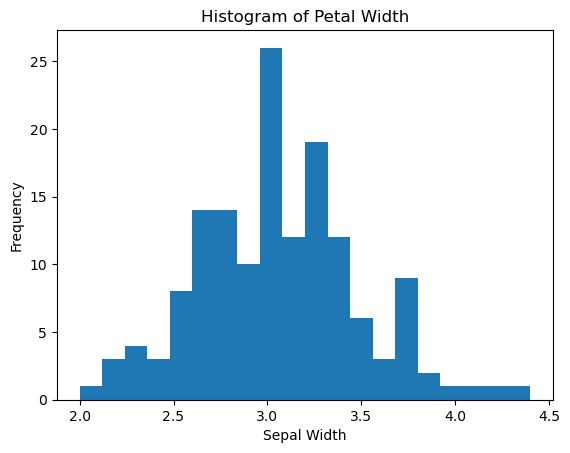

In [10]:
df_iris['sepal_width'].plot(kind='hist', bins=20)
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

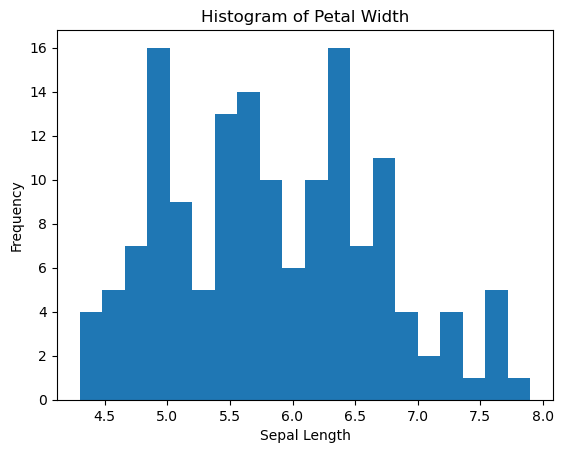

In [11]:
df_iris['sepal_length'].plot(kind='hist', bins=20)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

In [12]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'green', 'blue']

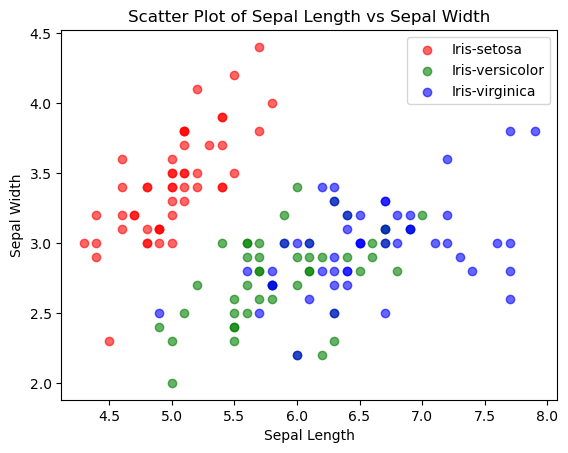

In [13]:
fig, ax = plt.subplots()

for i in range(3):
    x = df_iris[df_iris['species'] == species[i]]
    ax.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i], alpha=0.6)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.legend()
plt.show()

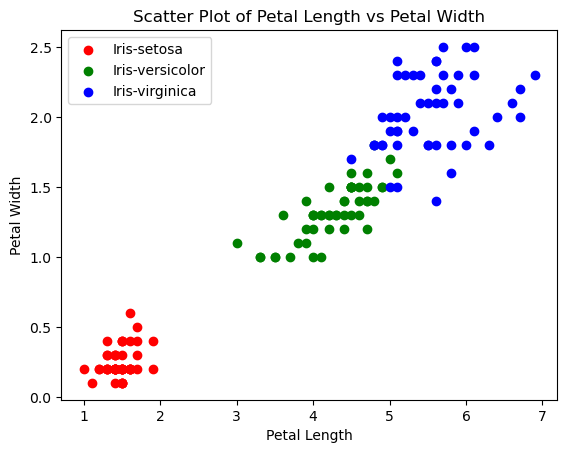

In [14]:
for i in range(3):
    x=df_iris[df_iris['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.legend()

<Axes: >

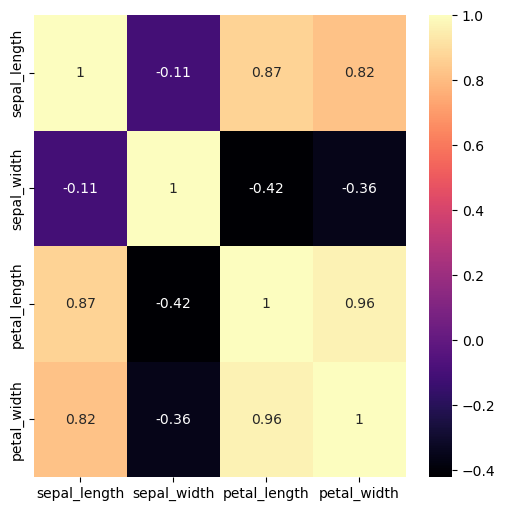

In [15]:
numeric_columns=df_iris.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(6,6))
sns.heatmap(corr,annot=True,ax=axis,cmap='magma')

In [16]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
le=LabelEncoder()

In [19]:
#split dependent and independent variables
X=df_iris.iloc[:,0:4]
y=df_iris.iloc[:,4]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

DecisionTreeClassifier

In [21]:
DTT = DecisionTreeClassifier(random_state=0)
DTT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
dt_pred = DTT.predict(X_test)
dt_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
DTT_acc=accuracy_score(y_test, dt_pred)
DTT_acc

1.0

In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test, dt_pred)
print(c_m)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN = KNeighborsClassifier()

In [32]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
kn_pred=KNN.predict(X_test)
kn_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [34]:
KNN_acc=accuracy_score(y_test, kn_pred)
KNN_acc

0.9666666666666667

LogisticRegression

In [35]:
LR=LogisticRegression()

In [36]:
LR.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
lr_pred=LR.predict(X_test)
lr_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [38]:
LR_acc=accuracy_score(y_test, lr_pred)
LR_acc

1.0

In [39]:
LR_acc=LR.score(X_test,y_test)*100
KNN_acc=KNN.score(X_test,y_test)*100
DTT_acc=DTT.score(X_test,y_test)*100

In [40]:
print("Accuracy with logistics regression", LR_acc)
print("Accuracy with K Nearest Neighbors ", KNN_acc)
print("Accuracy with Decision Tree Classifier", DTT_acc)

Accuracy with logistics regression 100.0
Accuracy with K Nearest Neighbors  96.66666666666667
Accuracy with Decision Tree Classifier 100.0
